In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
data = pd.read_csv("\\Users\\piyus\\Documents\\DataSet\\Heart_Attack\\heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.shape

(918, 12)

In [4]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# data visualization
### visulizing the distribution of data with the help of histogram

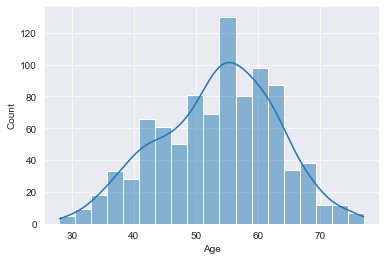

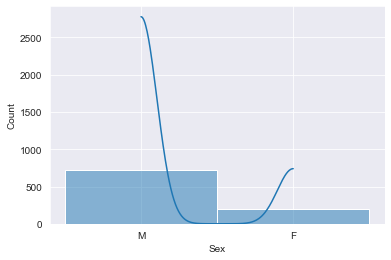

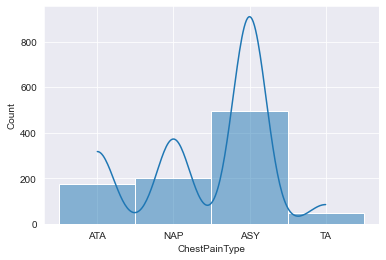

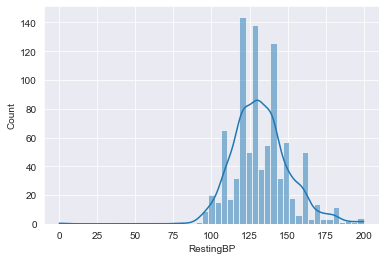

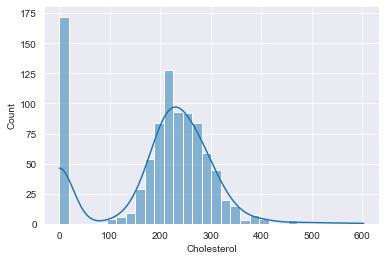

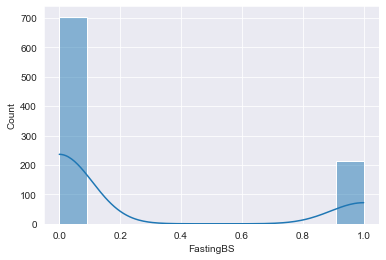

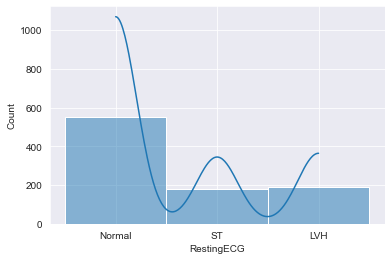

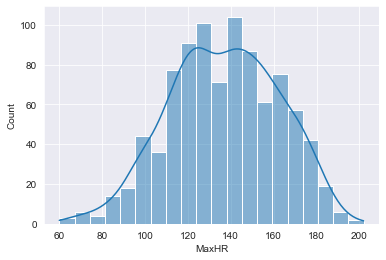

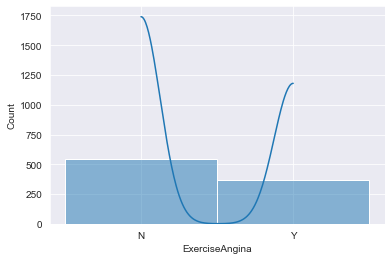

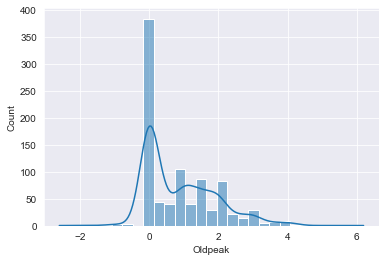

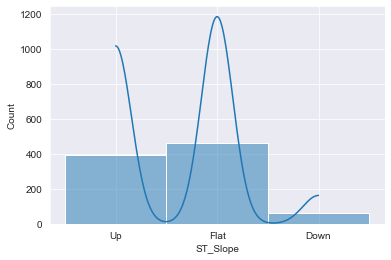

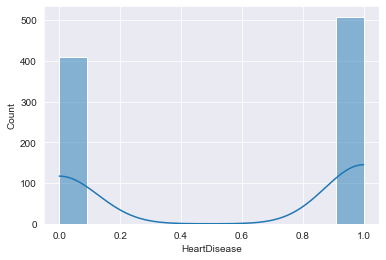

In [7]:
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.set_style('darkgrid')
    sns.histplot(data[col],kde=True)

In [8]:
# Analyzing Age column
#age
data.Age.dtypes

dtype('int64')

In [9]:
data.Age.describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [10]:
data.Age.unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

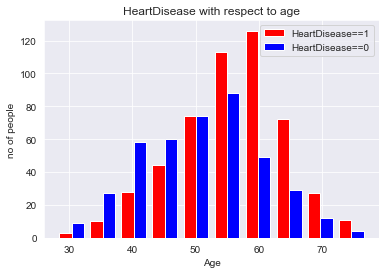

In [11]:
#visulizing age with respect to heartdisease
#age
Age_HeartDisease_1=data[data.HeartDisease==1].Age
Age_HeartDisease_0=data[data.HeartDisease==0].Age
plt.figure(figsize=[6,4])
plt.hist([Age_HeartDisease_1,Age_HeartDisease_0],color=['red','blue'],label=['HeartDisease==1','HeartDisease==0'])
plt.xlabel('Age')
plt.ylabel("no of people")
plt.title('HeartDisease with respect to age')
plt.legend()
plt.show()

**** Above graph shows tha as there is increase in a age of people the HeartDiseas amongs the people also increases ****

C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


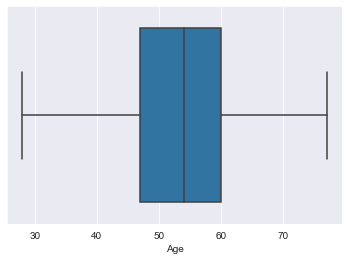

In [12]:
sns.boxplot(data.Age)
plt.show()

In [13]:
#analyzing Sex column
#sex
data.Sex.unique()

array(['M', 'F'], dtype=object)

In [14]:
print("number of male:",len(data[data['Sex']==('M')]))
print("number of female:",len(data[data['Sex']==('F')]))

number of male: 725
number of female: 193


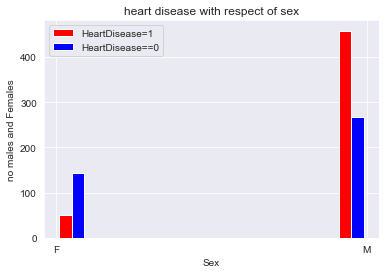

In [15]:
#visualizing Sex column with respect to HeartDisease
#sex
sex_HeartDisease_1=data[data.HeartDisease==1].Sex
sex_HeartDisease_0=data[data.HeartDisease==0].Sex
plt.figure(figsize=[6,4])
plt.hist([sex_HeartDisease_1,sex_HeartDisease_0],color=['red','blue'],label=['HeartDisease=1','HeartDisease==0'])
plt.xlabel('Sex')
plt.ylabel('no males and Females')
plt.title('heart disease with respect of sex')
plt.legend()
plt.show()

** male population has more HeartDisease problem than of female 

In [16]:
#Analyzing ChestPainType column
data.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [17]:
data.ChestPainType.describe()

count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

In [18]:
data.RestingBP.median()

130.0

In [19]:
print(" ATA: ", len(data[data.ChestPainType=='ATA']))
print(" NAP: ", len(data[data.ChestPainType=='NAP']))
print(" ASY: ", len(data[data.ChestPainType=='ASY']))
print(" TA: ", len(data[data.ChestPainType=='TA']))

 ATA:  173
 NAP:  203
 ASY:  496
 TA:  46


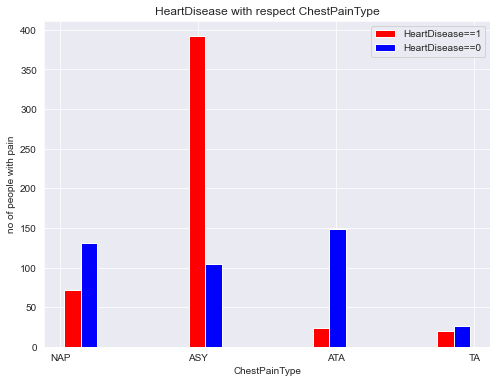

In [20]:
#analyzing ChestPainType with respet to HeartDisease
#ChestPainType
ChestPainType_HeartDisease_1=data[data.HeartDisease==1].ChestPainType
ChestPainType_HeartDisease_0=data[data.HeartDisease==0].ChestPainType
plt.figure(figsize=[8,6])
plt.hist([ChestPainType_HeartDisease_1,ChestPainType_HeartDisease_0],color=['red','blue'],label=['HeartDisease==1','HeartDisease==0'])
plt.xlabel('ChestPainType')
plt.ylabel('no of people with pain')
plt.title('HeartDisease with respect ChestPainType')
plt.legend()
plt.show()


**People having  ASY (Asymptomatic) type of pain seems to have higer chance of getting  HeartDisease, other type of pain i.e NAP, ATA, TA has lower chance of getting HeartDisease

In [21]:
#Analysing RestingBP column
#RestingBP
data['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164], dtype=int64)

In [22]:
data['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [23]:
median1=data['RestingBP'].median()
median1

130.0

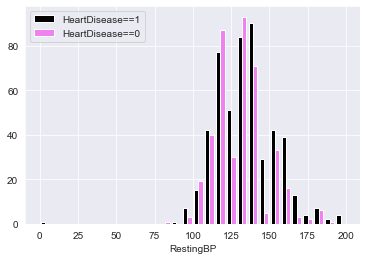

In [24]:
#visulzing RestingBP with respect of heartdisease
RestingBP_HeartDisease_1=data[data.HeartDisease==1].RestingBP
RestingBP_HeartDisease_0=data[data.HeartDisease==0].RestingBP
plt.hist([RestingBP_HeartDisease_1,RestingBP_HeartDisease_0],color=['black','violet'],label=['HeartDisease==1','HeartDisease==0'],bins=28)
plt.xlabel('RestingBP')
plt.legend()

  ** RestingBP nearly greater than 142 mm Hg are in high risk for HeartDisease as compared to RestingBP less
  than 142mm Hg 

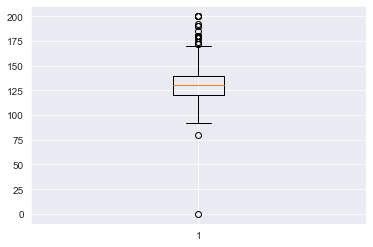

In [25]:
plt.boxplot(data.RestingBP)
plt.show()

In [26]:
rest_lout=data['RestingBP'].quantile(0.01)
rest_lout

95.0

In [27]:
rest_uout=data['RestingBP'].quantile(0.97)
rest_uout

170.0

In [28]:
data[data.RestingBP<rest_lout]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
227,38,M,ASY,92,117,0,Normal,134,Y,2.5,Flat,1
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1
692,39,F,NAP,94,199,0,Normal,179,N,0.0,Up,0
832,51,M,NAP,94,227,0,Normal,154,Y,0.0,Up,0


In [29]:
data[data.RestingBP>rest_uout]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
123,58,F,ATA,180,393,0,Normal,110,Y,1.0,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
190,46,M,ASY,180,280,0,ST,120,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
274,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
275,59,M,NAP,180,213,0,Normal,100,N,0.0,Up,0
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1


In [30]:
#repacing outlier with median of RestingBP column

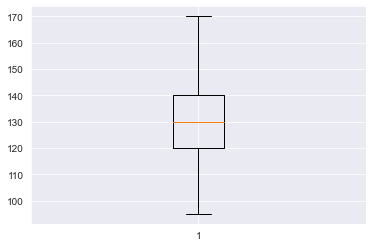

In [31]:
data['RestingBP']=np.where(data['RestingBP']<rest_lout,median1,data['RestingBP'])
data['RestingBP']=np.where(data['RestingBP']>rest_uout,median1,data['RestingBP'])
plt.boxplot(data.RestingBP)
plt.show()

In [32]:
#examining Cholesterol column
data['Cholesterol'].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [33]:
data['Cholesterol'].dtypes

dtype('int64')

In [34]:
data.Cholesterol.describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [35]:
median__=data.Cholesterol.median()
median__

223.0

Text(0.5, 0, 'Cholesterol')

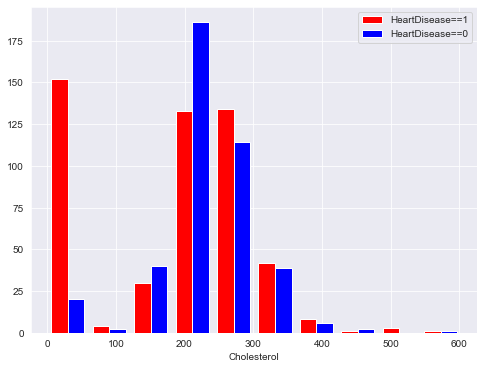

In [36]:
#Analyzing Cholesterol with respect to HeartDisease
Cholesterol_HeatDisease_1=data[data.HeartDisease==1].Cholesterol
Cholesterol_HeatDisease_0=data[data.HeartDisease==0].Cholesterol
plt.figure(figsize=[8,6])
plt.hist([Cholesterol_HeatDisease_1,Cholesterol_HeatDisease_0],color=['red','blue'],label=['HeartDisease==1','HeartDisease==0'])
plt.legend()
plt.xlabel('Cholesterol')

{'whiskers': [<matplotlib.lines.Line2D at 0x26ff1430970>,
 'caps': [<matplotlib.lines.Line2D at 0x26ff144b400>,
 'boxes': [<matplotlib.lines.Line2D at 0x26ff143cc70>],
 'medians': [<matplotlib.lines.Line2D at 0x26ff144b9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26ff144bc70>],
 'means': []}

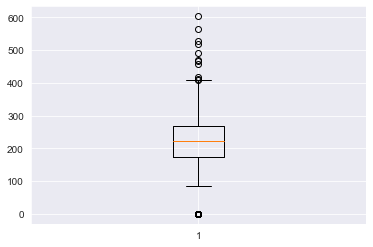

In [37]:
plt.boxplot(data.Cholesterol)

In [38]:
(data[(data['Cholesterol']==0) & (data['HeartDisease']==0)])

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
301,55,M,ATA,140.0,0,0,ST,150,N,0.2,Up,0
307,53,M,ATA,130.0,0,0,ST,120,N,0.7,Down,0
310,65,M,ASY,155.0,0,0,Normal,154,N,1.0,Up,0
314,53,M,ASY,130.0,0,0,Normal,141,Y,2.0,Down,0
326,45,M,NAP,110.0,0,0,Normal,138,N,-0.1,Up,0
332,38,M,NAP,100.0,0,0,Normal,179,N,-1.1,Up,0
336,72,M,NAP,160.0,0,0,LVH,114,N,1.6,Flat,0
364,56,M,NAP,120.0,0,0,Normal,97,N,0.0,Flat,0
421,66,M,NAP,120.0,0,0,ST,120,N,-0.5,Up,0
423,60,M,NAP,130.0,0,0,ST,140,Y,1.5,Flat,0


{'whiskers': [<matplotlib.lines.Line2D at 0x26ff14a3f70>,
 'caps': [<matplotlib.lines.Line2D at 0x26ff14b3550>,
 'boxes': [<matplotlib.lines.Line2D at 0x26ff14a3ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x26ff14b3af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26ff14b3dc0>],
 'means': []}

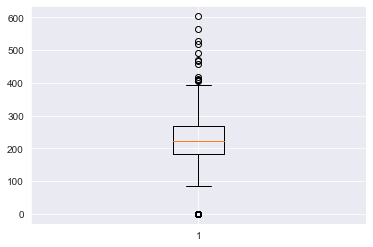

In [39]:
data['Cholesterol']=np.where((data['Cholesterol']==0) & (data['HeartDisease']==0),median__,data['Cholesterol'])
plt.boxplot(data['Cholesterol'])

In [40]:
uper_out=data['Cholesterol'].quantile(0.9803921568627452)
uper_out

385.05882352941205

{'whiskers': [<matplotlib.lines.Line2D at 0x26ff1511820>,
 'caps': [<matplotlib.lines.Line2D at 0x26ff1511dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26ff1511550>],
 'medians': [<matplotlib.lines.Line2D at 0x26ff15203a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26ff1520670>],
 'means': []}

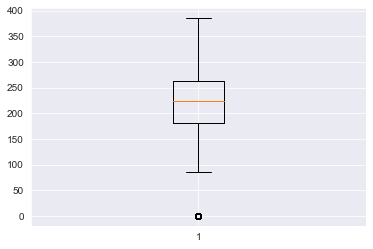

In [41]:
data['Cholesterol']=np.where(data['Cholesterol']>uper_out,median__,data['Cholesterol'])
plt.boxplot(data['Cholesterol'])

In [42]:
#analyzing FastingBS column
data['FastingBS'].unique()

array([0, 1], dtype=int64)

In [43]:
len(data[data['FastingBS']==1])

214

In [44]:
len(data[data['FastingBS']==0])

704

<AxesSubplot:xlabel='FastingBS'>

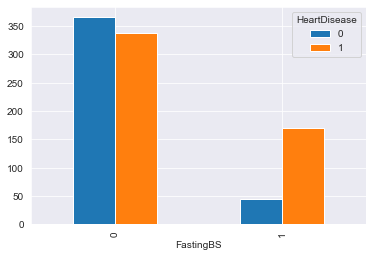

In [45]:
#comparing FastingBS column with HeartDisease
pd.crosstab(data.FastingBS,data.HeartDisease).plot(kind='bar')

In [46]:
#analyzing RestingECG column
data.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [47]:
len(data[data.RestingECG==('Normal')])

552

In [48]:
len(data[data.RestingECG==('ST')])

178

In [49]:
len(data[data.RestingECG==('LVH')])

188

<AxesSubplot:xlabel='RestingECG'>

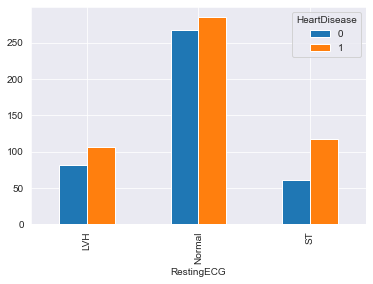

In [50]:
#comparing RestingECG with Heartdisease
pd.crosstab(data.RestingECG,data.HeartDisease).plot(kind='bar')

In [51]:
#analyzing MaxHR column
data['MaxHR'].unique()

array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103,  91, 126,  93, 131, 149, 123, 182, 141,  77,
       109, 133, 179, 113, 104,  95,  72,  97, 117,  86,  63, 157,  83,
        60,  70, 163,  67,  78,  84, 111,  80, 107, 161,  69,  88,  73,
       159, 151, 181, 186, 177, 173, 169, 171, 147,  71, 192, 195, 194,
       187, 202], dtype=int64)

In [52]:
data['MaxHR'].dtypes

dtype('int64')

In [53]:
data['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

In [54]:
median3=data['MaxHR'].median()
median3

138.0

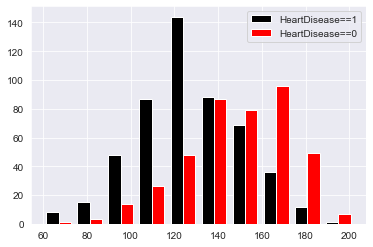

In [55]:
#comparing MaxHR with HeartDisease
MaxHR_HearDisease_1=data[data['HeartDisease']==1].MaxHR
MaxHR_HearDisease_0=data[data['HeartDisease']==0].MaxHR
plt.hist([MaxHR_HearDisease_1,MaxHR_HearDisease_0],color=['black','red'],label=['HeartDisease==1','HeartDisease==0'])
plt.legend()
plt.show()

(array([  9.,  18.,  62., 113., 192., 175., 148., 132.,  61.,   8.]),
 array([ 60. ,  74.2,  88.4, 102.6, 116.8, 131. , 145.2, 159.4, 173.6,
        187.8, 202. ]),
 <BarContainer object of 10 artists>)

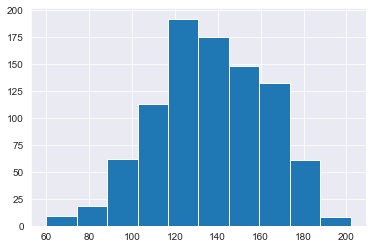

In [56]:
plt.hist(data['MaxHR'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26ff27aee50>,
 'caps': [<matplotlib.lines.Line2D at 0x26ff27bf430>,
 'boxes': [<matplotlib.lines.Line2D at 0x26ff279e9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x26ff27bf9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26ff27bfca0>],
 'means': []}

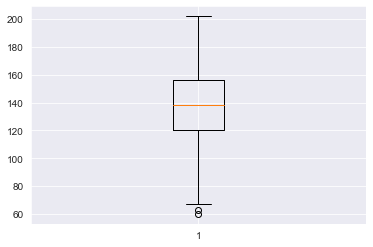

In [57]:
plt.boxplot(data['MaxHR'])

In [58]:
lwer_out=data['MaxHR'].quantile(0.032679738562091504)
lwer_out

90.9673202614379

{'whiskers': [<matplotlib.lines.Line2D at 0x26ff2815c70>,
 'caps': [<matplotlib.lines.Line2D at 0x26ff2824250>,
 'boxes': [<matplotlib.lines.Line2D at 0x26ff28159a0>],
 'medians': [<matplotlib.lines.Line2D at 0x26ff28247f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26ff2824ac0>],
 'means': []}

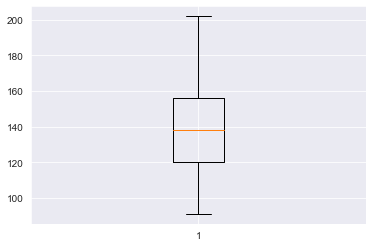

In [59]:
data['MaxHR']=np.where(data['MaxHR']<lwer_out,median3,data['MaxHR'])
plt.boxplot(data['MaxHR'])

In [60]:
#analyzing ExerciseAngina column
data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [61]:
len(data[data['ExerciseAngina']==('N')])

547

In [62]:
len(data[data['ExerciseAngina']==('Y')])

371

<AxesSubplot:xlabel='ExerciseAngina'>

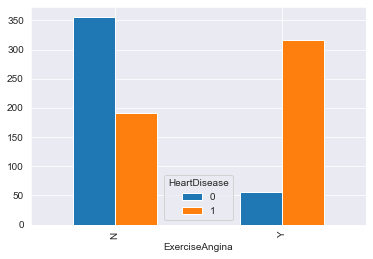

In [63]:
#comparing ExerciseAngina with heartDisease column
pd.crosstab(data['ExerciseAngina'],data['HeartDisease']).plot(kind='bar')

In [64]:
#analyzing Oldpeak column
data['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

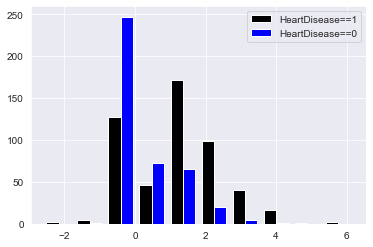

In [65]:
oldpeak_heartdisease_1=data[data['HeartDisease']==1].Oldpeak
oldpeak_heartdisease_0=data[data['HeartDisease']==0].Oldpeak
plt.hist([oldpeak_heartdisease_1,oldpeak_heartdisease_0],color=['black','blue'],label=['HeartDisease==1','HeartDisease==0'])
plt.legend()
plt.show()

In [66]:
data['Oldpeak'].describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

In [67]:
median4=data['Oldpeak'].median()
median4

0.6

(array([  2.,   5., 374., 118., 236., 119.,  44.,  17.,   1.,   2.]),
 array([-2.6 , -1.72, -0.84,  0.04,  0.92,  1.8 ,  2.68,  3.56,  4.44,
         5.32,  6.2 ]),
 <BarContainer object of 10 artists>)

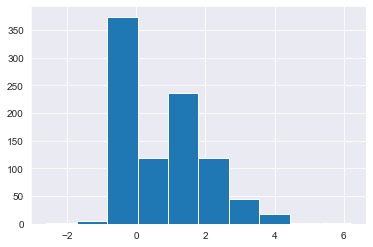

In [68]:
plt.hist(data['Oldpeak'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26ff10880d0>,
 'caps': [<matplotlib.lines.Line2D at 0x26ff1099be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26ff10886a0>],
 'medians': [<matplotlib.lines.Line2D at 0x26ff1099070>],
 'fliers': [<matplotlib.lines.Line2D at 0x26ff0f94400>],
 'means': []}

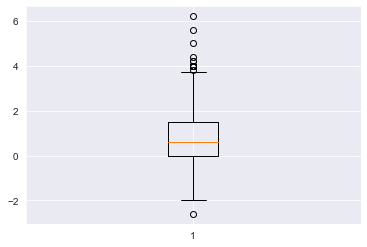

In [69]:
plt.boxplot(data['Oldpeak'])

In [70]:
lower_ouut=data['Oldpeak'].quantile(0.0010893246187363835)
lower_ouut

-2.000653594771242

In [71]:
upper_ouut=data['Oldpeak'].quantile(0.9825708061002179)
upper_ouut

3.6017429193899715

In [72]:
data[data['Oldpeak']<lower_ouut]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
324,46,M,ASY,100.0,0.0,1,ST,133.0,N,-2.6,Flat,1


In [73]:
data[data['Oldpeak']>upper_ouut]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
68,52,M,ASY,160.0,246.0,0,ST,138.0,Y,4.0,Flat,1
166,50,M,ASY,140.0,231.0,0,ST,140.0,Y,5.0,Flat,1
337,63,M,ASY,150.0,0.0,1,ST,154.0,N,3.7,Up,1
500,65,M,ASY,136.0,248.0,0,Normal,140.0,Y,4.0,Down,1
521,61,M,ASY,120.0,282.0,0,ST,135.0,Y,4.0,Down,1
537,74,M,ASY,150.0,258.0,1,ST,130.0,Y,4.0,Down,1
559,64,M,ASY,134.0,273.0,0,Normal,102.0,Y,4.0,Down,1
624,63,F,ASY,150.0,223.0,0,LVH,154.0,N,4.0,Flat,1
702,59,M,TA,130.0,270.0,0,LVH,145.0,N,4.2,Down,0
732,56,F,ASY,130.0,288.0,1,LVH,133.0,Y,4.0,Down,1


{'whiskers': [<matplotlib.lines.Line2D at 0x26ff0fad100>,
 'caps': [<matplotlib.lines.Line2D at 0x26ff100b460>,
 'boxes': [<matplotlib.lines.Line2D at 0x26ff0fad4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x26ff100bac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26ff100bf10>],
 'means': []}

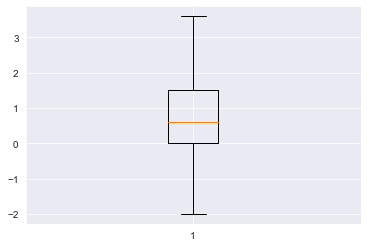

In [74]:
data['Oldpeak']=np.where(data['Oldpeak']<lower_ouut,median4,data['Oldpeak'])
data['Oldpeak']=np.where(data['Oldpeak']>upper_ouut,median4,data['Oldpeak'])
plt.boxplot(data['Oldpeak'])

In [75]:
#analyzing St_Slope column
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [76]:
len(data[data['ST_Slope']==('Up')])

395

In [77]:
len(data[data['ST_Slope']==('Flat')])

460

In [78]:
len(data[data['ST_Slope']==('Down')])

63

<AxesSubplot:xlabel='ST_Slope'>

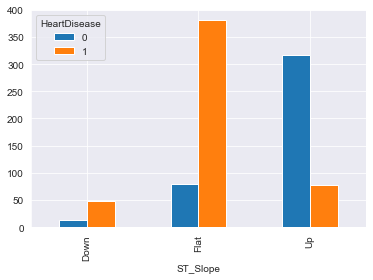

In [79]:
#comparing ST_Slope with HeartDisease column
pd.crosstab(data['ST_Slope'],data['HeartDisease']).plot(kind='bar')

In [80]:
#creating dummie variable
data=pd.get_dummies(data)

In [81]:
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172.0,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160.0,180.0,0,156.0,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98.0,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,0,108.0,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,0,122.0,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [82]:
data.shape

(918, 21)

In [83]:
data.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [84]:
#spliting target valiable and independent variable
X=data.drop(labels='HeartDisease',axis=1)
Y=data['HeartDisease']

In [85]:
X.shape

(918, 20)

In [86]:
Y.shape

(918,)

In [87]:
#spliting data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=90)

In [88]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((688, 20), (230, 20), (688,), (230,))

In [89]:
# importing all classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [90]:
#function to find best model as well as to find best parameter of respective model
def best_model(X_train,X_test,y_train,y_test):
    moddeel={
        'LogisticRegression' : {
            'model': LogisticRegression(max_iter=10000000),
            'params': {
                'solver': ['lbfgs', 'liblinear']
            }
        },
        'DecisionTree' : {
            'model' : DecisionTreeClassifier(),
            'params' : {
                'criterion' : ['gini', 'entropy'],'splitter':['best', 'random']
            }
        },
        'RandomForest' : {
            'model' : RandomForestClassifier(),
            'params' : {
                'criterion' : ['gini', 'entropy']
            }
        },
        'SVM':{
            'model':SVC(),
            'params':{
                'gamma':['scale','auto']
            }
        },
        'GaussianNB':{
            'model':GaussianNB(),
            'params':{
                'var_smoothing':[1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15]
            }
        },
        'Perceptron':{
            'model':Perceptron(),
            'params':{
                'penalty':['l2','l1','elasticnet']
            }
        }
    }
    Score=[]
    for moddeel_name,config in moddeel.items():
        gs=GridSearchCV(config['model'],config['params'])
        gs.fit(X_train,y_train)
        gs.predict(X_test)
        Score.append({
            'model':moddeel_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_,
            'test_score':gs.score(X_test,y_test),
            'train_score':gs.score(X_train,y_train)
        })
    
    
    return pd.DataFrame(Score,columns=['model','best_score','best_params','test_score','train_score'])

In [91]:
#function to check accuracy score
from sklearn.pipeline import Pipeline
def class_report(X_train,X_test,y_train,y_test):
    piplines=[]
    piplines.append(('LogisticRegression',Pipeline([('LogisticRegression',LogisticRegression(solver='liblinear',max_iter=10000000))])))
    piplines.append(('DecisionTree',Pipeline([('DecisionTree',DecisionTreeClassifier(criterion= 'entropy', splitter='best'))])))
    piplines.append(('Randomforest',Pipeline([('Randomforest',RandomForestClassifier(criterion= 'entropy'))])))
    piplines.append(('SVM',Pipeline([('SVM',SVC(gamma='scale'))])))
    piplines.append(('GaussianNB',Pipeline([('GaussianNB',GaussianNB(var_smoothing=1e-06))])))
    piplines.append(('Perceptron',Pipeline([('Perceptron',Perceptron(penalty='l1'))])))
    
    for name, model in piplines:
        result = cross_val_score(model,X_train,y_train)
        model.fit(X_train,y_train)
        y_pred= model.predict(X_test)
        print(classification_report(y_test,y_pred))
        msg = "%s: %f (%f)" % (name, result.mean(), result.std())
        print(msg)
        

In [93]:
best_model(X_train,X_test,y_train,y_test)

,model,best_score,best_params,test_score,train_score
0,LogisticRegression,0.860499,{'solver': 'liblinear'},0.865217,0.866279
1,DecisionTree,0.816884,"{'criterion': 'entropy', 'splitter': 'best'}",0.813043,1.000000
2,RandomForest,0.873575,{'criterion': 'entropy'},0.882609,1.000000
3,SVM,0.719444,{'gamma': 'scale'},0.739130,0.726744
4,GaussianNB,0.864794,{'var_smoothing': 1e-06},0.865217,0.866279
5,Perceptron,0.626531,{'penalty': 'l1'},0.604348,0.587209


In [94]:
class_report(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84        99
           1       0.88      0.89      0.88       131

    accuracy                           0.87       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.87      0.87      0.87       230

LogisticRegression: 0.860499 (0.020992)
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.84      0.79      0.81       131

    accuracy                           0.79       230
   macro avg       0.79      0.79      0.79       230
weighted avg       0.79      0.79      0.79       230

DecisionTree: 0.811055 (0.010111)
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        99
           1       0.90      0.92      0.91       131

    accuracy                           0.90       230
   macro avg       0.89      0.89      0.89       230


*** as random forest is performing better than other model so we will choose Random forest to predict our model

In [97]:
model=RandomForestClassifier(criterion= 'entropy')
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [98]:
model.score(X_train,y_train)

1.0

In [102]:
model.score(X_test,y_test)

1.0

In [104]:
pred=model.predict(X_test)

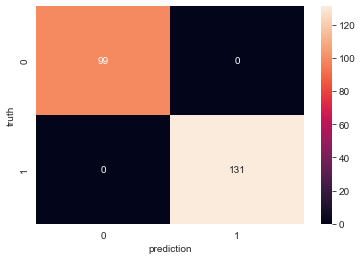

In [106]:
from sklearn.metrics import confusion_matrix
clf=confusion_matrix(pred,y_test)
sns.heatmap(clf,annot=True,fmt='g')
plt.xlabel("prediction")
plt.ylabel("truth")
plt.show()